This notebook is **STRICTLY** used to create the plots in the paper.

In [5]:
import os
import sys
import time
import numpy as np
import pandas as pd
import scipy as sp
from typing import List
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm, ticker
from astropy.io import fits
import astropy.io.ascii as astropy_ascii
from astropy.table import Table
from astropy import units as u
from astropy.coordinates import SkyCoord

src_dir = '/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/src'
if not src_dir in sys.path: sys.path.append(src_dir)
utils_dir = '/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0/src/utils'
if not utils_dir in sys.path: sys.path.append(utils_dir)
from constants import *
from CosmoFunc import *

from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.special import erf

from matplotlib.ticker import FormatStrFormatter

from step_7_fit_fp import fit_FP
from step_8_fit_logdist import fit_logdist

# Plot configurations
GOLDEN_RATIO = 0.5*(1+np.sqrt(5))
FIGURE_HEIGHT = 5
FIGURE_WIDTH = FIGURE_HEIGHT*GOLDEN_RATIO
DEFAULT_FIGSIZE = (FIGURE_WIDTH, FIGURE_HEIGHT)

# ROOT_PATH = '/Users/mrafifrbbn/Documents/thesis/thesis-research-2.0'
from dotenv import load_dotenv
load_dotenv()

ROOT_PATH = os.environ.get('ROOT_PATH')
SMIN_SETTING = int(os.environ.get('SMIN_SETTING'))
FP_SETTING = int(os.environ.get('FP_SETTING'))
COMPLETENESS_SETTING = int(os.environ.get('COMPLETENESS_SETTING'))

# A. Redshift, Magnitude, and FP observables distributions

6dFGS | 6974
SDSS | 4158
LAMOST | 2111


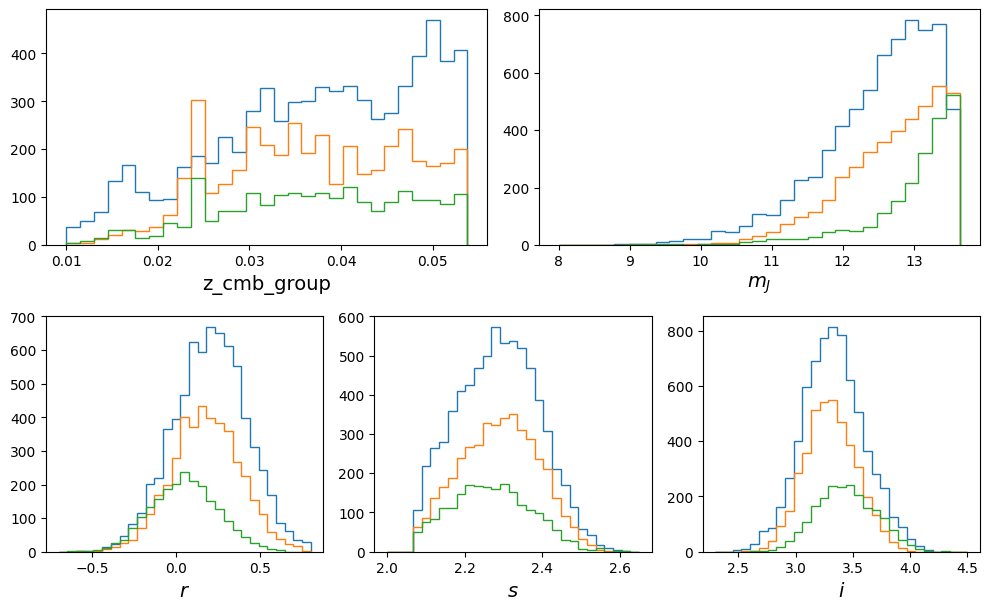

In [28]:
# Create a figure
fig = plt.figure(figsize=(10, 18))

# Create a GridSpec with 3 rows and 3 columns
gs = gridspec.GridSpec(6, 6, figure=fig)

# First row, two equal sized columns
ax1 = fig.add_subplot(gs[0, 0:3])
ax2 = fig.add_subplot(gs[0, 3:])
# Second row, three equal sized columns
ax3 = fig.add_subplot(gs[1, 0:2])
ax4 = fig.add_subplot(gs[1, 2:4])
ax5 = fig.add_subplot(gs[1, 4:6])

# Column names and labels
cols = ['z_dist_est', 'mag_j', 'r', 's', 'i']
col_labels = ['z_cmb_group', r'$m_J$', r'$r$', r'$s$', r'$i$']

# Number of bins
N_BINS = 30

# Define the bins
hist_bins = {
    "z_dist_est": np.linspace(ZMIN, ZMAX, N_BINS), # redshift bins
    "mag_j": np.linspace(MAG_LOW, MAG_HIGH, N_BINS), # magnitude bins
    "r": np.linspace(-0.7, 0.8, N_BINS), # radius bins
    "s": np.linspace(2.0, 2.65, N_BINS), # veldisp bins
    "i": np.linspace(2.3, 4.5, N_BINS) # intensity bins
}

for survey in SURVEY_LIST:
    df = pd.read_csv(f'../data/foundation/fp_sample_final/smin_setting_1/completeness_setting_0/{survey.lower()}.csv')
    print(survey, '|', len(df))
    df['mag_j'] = df['j_m_ext'] - df['extinction_j']

    for i, col in enumerate(cols):
        ax = fig.axes[i]
        ax.hist(df[col], bins=hist_bins.get(col), histtype='step')
        ax.set_xlabel(col_labels[i], fontsize=14)
#         ax.set_ylabel(r'$N$', fontsize=14)
#         ax.set_yscale('log')

# Adjust layout to make it look nice
fig.tight_layout()
# fig.savefig('../img/final_plot/fp_distributions.pdf', bbox_inches='tight', dpi=300)